# Geometric Algebra For Conics in Python
This notebook is an experiment in doing calculations with the Geometric Algebra for Conics of Perwass/Hrdina, Navrat and Vasik 

In [1]:
from clifford.gac import *
from clifford import MVArray
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# These constants map between the infinities defined by Perwass and
# those defined by Hrdina, Navrat and Vasik
nx = n3
nxb = n3b
nm = n2
nmb = n2b
n = n1
nb = n1b

# The 8D pseudoscalar
I8 = e12345678
# Other pseudoscalars
Ioi = nb*nmb*nxb*e1*e2*n
Iio = nb*e1*e2*n*nm*nx

def normalise_conic(con):
    """
    Normalises an op rep conic so it squares to +-1
    """
    fullcon = (con^(n1b - n2b)^n3b)
    return con/np.sqrt(abs((fullcon*~fullcon)[0]))

def rand_dp():
    """
    Generates a random point on the e1 e2 plane
    """
    return np.random.randn()*e1 + np.random.randn()*e2

def random_conic():
    """
    Generates a random conic from the outer product of 5 random points
    """
    return normalise_conic(MVArray([up(rand_dp()) for _ in range(5)]).op())

def to_ip_rep(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    Converts an opns conic to an ipns conic
    """
    return (con^n2b^nxb)*e12345678

def to_op_rep(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    Converts an ipns conic to an opns conic
    """
    return (con^n2^nx)*e12345678

def generate_ipn_func(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    It generates a function that evaluates the inner product of a point
    with a given conic, used in the visualisation function
    """
    ipncon = to_ip_rep(con)
    def ipn_func(x, y):
        return (up(x*e1 + y*e2)|ipncon)[0]
    return ipn_func

def visualise_conic(xs, ys, con):
    ipn_func_con = generate_ipn_func(con)
    img = np.zeros((len(xs),len(ys)))
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            img[j,i] = ipn_func_con(x, y)
    return img

def normalise_n_minus_1(p):
    pnew = p(1)
    pnew = -pnew/(pnew|n)[0]
    return up((down(pnew)))

def full_opns(con):
    return con^(n1b - n2b)^n3b

## Conics are made from the outer product of points
The up(x) function embeds a point into the conic space

In [12]:
rand_down_points = MVArray([rand_dp() for _ in range(5)])
rand_up_points = MVArray([up(p) for p in rand_down_points])
rand_con = normalise_conic(rand_up_points.op())

print(rand_up_points[0])
print( (full_opns(rand_con)*rand_up_points[0]*full_opns(rand_con)) )
print( (full_opns(rand_con)*rand_up_points[0]*full_opns(rand_con))|n )

(0.10151^e1) + (0.98755^e2) - (0.49485^e3) - (0.01238^e4) + (0.10025^e5) + (0.50515^e6) + (0.98762^e7) + (0.10025^e8)
(0.10151^e1) + (0.98755^e2) - (0.49485^e3) - (0.01238^e4) + (0.10025^e5) + (0.50515^e6) + (0.98762^e7) + (0.10025^e8)
-1.0


## You can render conics and the points that they are formed from

<IPython.core.display.Javascript object>


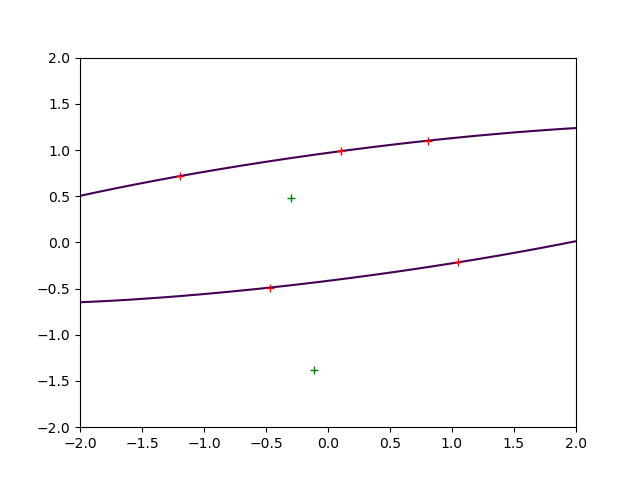

In [13]:
%matplotlib notebook
plt.figure()
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
plt.contour(xs, ys, img1, [0])
xpoints,ypoints = zip(*rand_down_points.value[:,1:3])
plt.plot(xpoints,ypoints,'+r')

ptest = up(rand_dp())
ref = ((rand_con^(n1b - n2b)^n3b)*ptest*(rand_con^(n1b - n2b)^n3b))
refres = -ref/(ref|n)

p0x, p0y = ptest.value[1:3]
plt.plot(p0x,p0y,'+g')

p0x, p0y = refres.value[1:3]
plt.plot(p0x,p0y,'+g')

In [5]:
ptest = up(rand_dp())
print(ptest)
ref = ((rand_con^(n1b - n2b)^n3b)*rand_up_points[0]*(rand_con^(n1b - n2b)^n3b))
-ref/(ref|n)

-(0.2488^e1) - (1.06181^e2) - (0.46905^e3) + (0.06372^e4) + (0.26418^e5) + (0.53095^e6) + (1.06372^e7) + (0.26418^e8)


(0.67782^e1) + (0.24859^e2) - (0.27028^e3) - (0.4691^e4) + (0.1685^e5) + (0.72972^e6) + (0.5309^e7) + (0.1685^e8)

In [14]:
rand_up_points[0]

(0.10151^e1) + (0.98755^e2) - (0.49485^e3) - (0.01238^e4) + (0.10025^e5) + (0.50515^e6) + (0.98762^e7) + (0.10025^e8)

## You can also render multiple conics on the same image

<IPython.core.display.Javascript object>


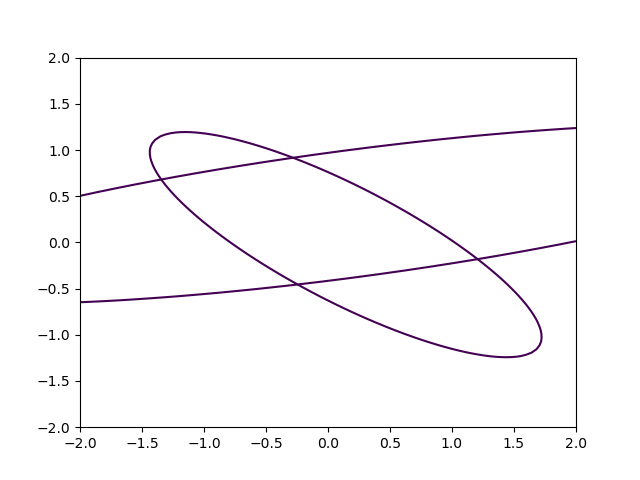

In [15]:
%matplotlib notebook
plt.figure()
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
rand_con_2 = random_conic()
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

In [18]:
m0 = layout.get_grade_projection_matrix(0)
m1 = layout.get_grade_projection_matrix(1)
m6 = layout.get_grade_projection_matrix(6)
opmat = m6@layout.get_left_gmt_matrix(rand_con)@m1

In [19]:
# ipmat = np.vstack((m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con))@m1,
#                                       m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con_2))@m1))

ipmat = np.vstack((m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con))@m1,
                                      m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con_2))@m1))

In [20]:

refmat = m1@layout.get_left_gmt_matrix(full_opns(rand_con_2))@layout.get_right_gmt_matrix(rand_con_2^(n1b - n2b)^n3b)@m1@layout.get_left_gmt_matrix(rand_con^(n1b - n2b)^n3b)@layout.get_right_gmt_matrix(rand_con^(n1b - n2b)^n3b)@m1

In [21]:
u, s, vh = np.linalg.svd(refmat)
print(u.shape)
print(s.shape)
print(vh.shape)

(256, 256)
(256,)
(256, 256)


In [22]:
def get_intersection(cons, start=up(0*e1)):
    pnow = start
    for c in cons:
        conop = (c^(n1b - n2b)^n3b)
        pnew = conop*pnow*conop
        pnow = normalise_n_minus_1(pnew)
    return pnow

<IPython.core.display.Javascript object>


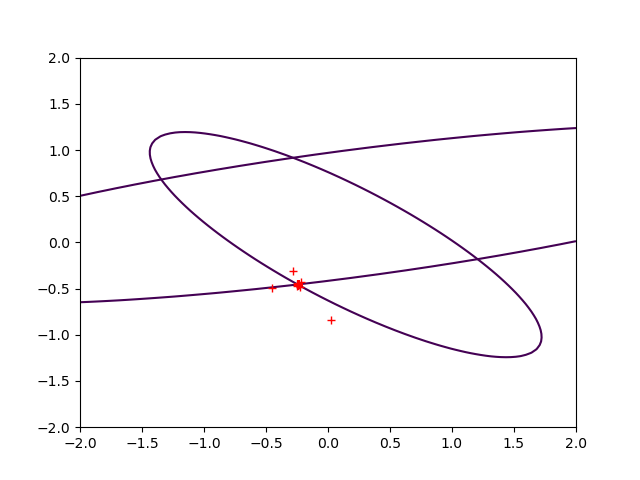

(-2, 2)

In [23]:
%matplotlib notebook
plt.figure()

# rand_con_3 = random_conic()

pnow = up(0.0*e1)
for i in range(1000):
    pnow = get_intersection([rand_con, rand_con_2], start=pnow)
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)
# img3 = visualise_conic(xs, ys, rand_con_3)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])
# plt.contour(xs, ys, img3, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))

<IPython.core.display.Javascript object>


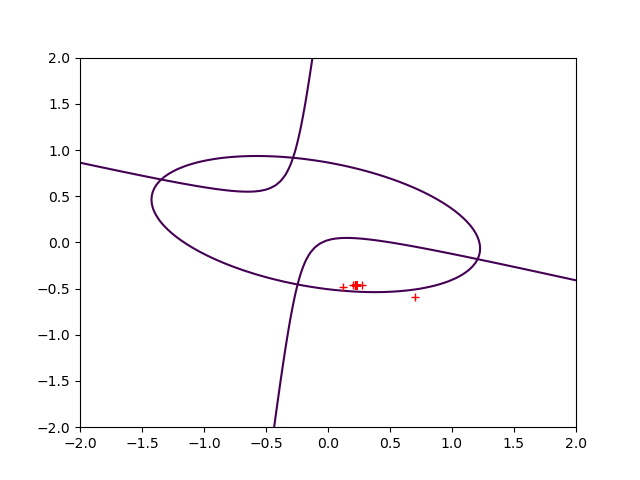

0


(-2, 2)

In [27]:
%matplotlib notebook
plt.figure()

conp = normalise_conic(rand_con + rand_con_2)
conm = normalise_conic(rand_con - rand_con_2)
print( conp|conm )


xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, conp)
img2 = visualise_conic(xs, ys, conm )
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

pnow = up(0.0*e1)
for i in range(1000):
    pnow = get_intersection([conp, conm], start=pnow)
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')

plt.xlim((-2,2))
plt.ylim((-2,2))



<IPython.core.display.Javascript object>


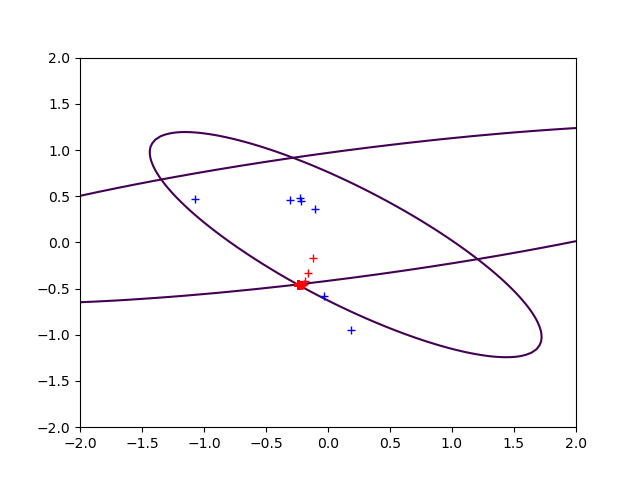

0.0
1.0000000000000002
(0.22055^e1) - (0.44841^e2) - (0.47568^e3) - (0.39947^e4) - (0.0989^e5) + (0.52432^e6) + (0.60053^e7) - (0.0989^e8)
0.8965313130289929
(0.2274^e1) - (0.48529^e2) - (0.47415^e3) - (0.38225^e4) - (0.11035^e5) + (0.52585^e6) + (0.61775^e7) - (0.11035^e8)
-0.8965313130289942
(0.02989^e1) + (0.57853^e2) - (0.49955^e3) - (0.33265^e4) + (0.01729^e5) + (0.50045^e6) + (0.66735^e7) + (0.01729^e8)
1.0
(0.3075^e1) - (0.46304^e2) - (0.45272^e3) - (0.3928^e4) - (0.14238^e5) + (0.54728^e6) + (0.6072^e7) - (0.14238^e8)
0.9999999999999996
-(0.18938^e1) + (0.94497^e2) - (0.48207^e3) - (0.05352^e4) - (0.17896^e5) + (0.51793^e6) + (0.94648^e7) - (0.17896^e8)
0.9999999999999997
(3.10029^e1) - (1.27207^e2) + (4.3059^e3) + (0.30909^e4) - (3.9438^e5) + (5.3059^e6) + (1.30909^e7) - (3.9438^e8)
1.0
(0.10635^e1) - (0.36446^e2) - (0.49435^e3) - (0.43358^e4) - (0.03876^e5) + (0.50565^e6) + (0.56642^e7) - (0.03876^e8)
0.9999999999999998
(1.07052^e1) - (0.46636^e2) + (0.07301^e3) - (0.39125^e4

In [24]:
%matplotlib notebook
plt.figure()

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)

plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

plt.xlim((-2,2))
plt.ylim((-2,2))

refleft = layout.get_left_gmt_matrix(full_opns(rand_con))@layout.get_right_gmt_matrix(full_opns(rand_con))
refright = layout.get_left_gmt_matrix(full_opns(rand_con_2))@layout.get_right_gmt_matrix(full_opns(rand_con_2))
reffull = (0.5*refleft + 0.5*refright)@m1
print( np.linalg.det(reffull) )

bk1 = up(-2.0*e2).value
for i in range(1000):
    bk1 = reffull@bk1
    pnow = normalise_n_minus_1(0.5*pnow + 0.5*normalise_n_minus_1(layout.MultiVector(value=bk1)))
    bk1 = pnow.value
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')
    
w,v = np.linalg.eig(reffull)
for i in range(256):
    if abs(np.real(w[i])) > 0.01:
        print(w[i])
        explicit_val = normalise_n_minus_1(layout.MultiVector(value=np.real(v[:,i])))
        print(explicit_val)
        x, y = (explicit_val).value[1:3]
        plt.plot([-x],[-y],'+b')

In [25]:
(to_ip_rep(rand_con)^to_ip_rep(rand_con_2))**2

-0.0043

In [28]:
(to_ip_rep(conm)^to_ip_rep(conp))**2

-0.0219

<IPython.core.display.Javascript object>


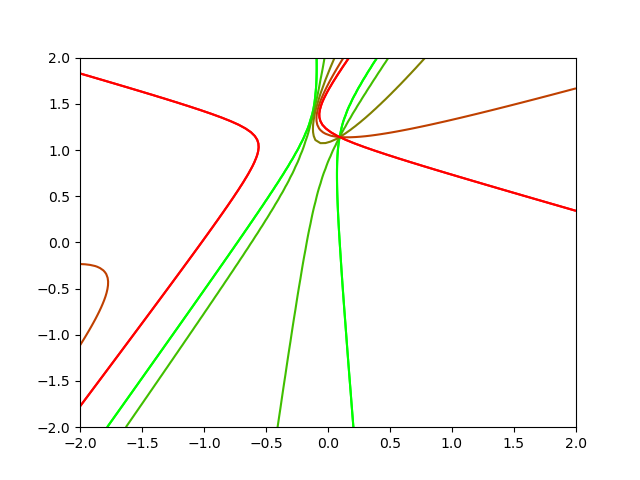

(-2, 2)

In [29]:
%matplotlib notebook
plt.figure()

rand_con = random_conic()
rand_con_2 = random_conic()

c1 = np.array([0.0,1.0,0.0])
c2 = np.array([1.0,0.0,0.0])
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2 )
plt.contour(xs, ys, img1, [0], colors=[c1])
plt.contour(xs, ys, img2, [0], colors=[c2])

pnow = up(0.0*e1)
for alpha in np.linspace(0,1,5):
    conint = ((1-alpha)*rand_con + alpha*rand_con_2)
    img = visualise_conic(xs, ys, conint)
    plt.contour(xs, ys, img, [0], colors=[(1-alpha)*c1 + alpha*c2])

plt.xlim((-2,2))
plt.ylim((-2,2))



In [30]:
meetval = to_op_rep((to_ip_rep(rand_con)^to_ip_rep(rand_con_2)))
meetval

(0.07973^e1234) + (0.22668^e1235) + (0.12012^e1236) + (0.07973^e1237) + (0.22668^e1238) + (0.45305^e1245) + (0.32037^e1246) + (0.45305^e1248) + (0.22829^e1256) - (0.45305^e1257) - (0.32037^e1267) - (0.22829^e1268) + (0.45305^e1278) - (0.32192^e1345) - (0.1696^e1346) - (0.32192^e1348) + (0.00279^e1356) + (0.32192^e1357) + (0.1696^e1367) - (0.00279^e1368) - (0.32192^e1378) + (0.32978^e1456) - (0.32978^e1468) + (0.32978^e1567) + (0.32978^e1678) - (0.03962^e2345) + (0.03447^e2346) - (0.03962^e2348) + (0.15768^e2356) + (0.03962^e2357) - (0.03447^e2367) - (0.15768^e2368) - (0.03962^e2378) + (0.35504^e2456) - (0.35504^e2468) + (0.35504^e2567) + (0.35504^e2678) - (0.22344^e3456) + (0.22344^e3468) - (0.22344^e3567) - (0.22344^e3678)

<IPython.core.display.Javascript object>


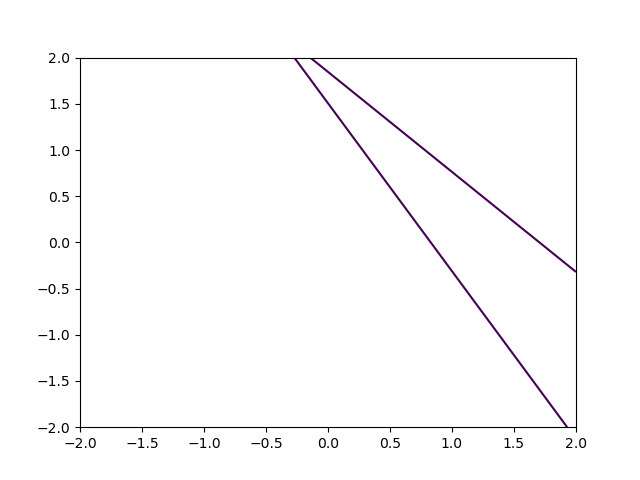

-(2.08788^e12345) - (2.08788^e12348) + (2.08788^e12357) - (2.08788^e12378) - (2.08788^e12456) + (2.08788^e12468) - (2.08788^e12567) - (2.08788^e12678) + (1.13148^e13456) + (1.13148^e13457) - (1.13148^e13468) - (1.13148^e13478) + (1.13148^e13567) + (1.13148^e13678) + (1.13148^e14567) + (1.13148^e14678) - (1.22471^e23456) - (1.22471^e23457) + (1.22471^e23468) + (1.22471^e23478) - (1.22471^e23567) - (1.22471^e23678) - (1.22471^e24567) - (1.22471^e24678)
(1.36683^e12345) + (1.36683^e12348) - (1.36683^e12357) + (1.36683^e12378) + (1.36683^e12456) - (1.36683^e12468) + (1.36683^e12567) + (1.36683^e12678) - (0.90764^e13456) - (0.90764^e13457) + (0.90764^e13468) + (0.90764^e13478) - (0.90764^e13567) - (0.90764^e13678) - (0.90764^e14567) - (0.90764^e14678) + (1.64969^e23456) + (1.64969^e23457) - (1.64969^e23468) - (1.64969^e23478) + (1.64969^e23567) + (1.64969^e23678) + (1.64969^e24567) + (1.64969^e24678)


(-2, 2)

In [31]:
%matplotlib notebook
plt.figure()

p1 = up(rand_dp())
p2 = up(rand_dp())
L1 = p1^p2^n1^n2^n3
print(L1)

p3 = up(rand_dp())
p4 = up(rand_dp())
L2 = p3^p4^n1^n2^n3
print(L2)

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, L1)
img2 = visualise_conic(xs, ys, L2)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))

In [32]:
to_op_rep((to_ip_rep(L1)^to_ip_rep(L2)))

(0.3485^e1345) + (0.3485^e1348) - (0.3485^e1357) + (0.3485^e1378) + (0.3485^e1456) - (0.3485^e1468) + (0.3485^e1567) + (0.3485^e1678) - (1.77039^e2345) - (1.77039^e2348) + (1.77039^e2357) - (1.77039^e2378) - (1.77039^e2456) + (1.77039^e2468) - (1.77039^e2567) - (1.77039^e2678) + (0.755^e3456) - (0.755^e3468) + (0.755^e3567) + (0.755^e3678)

In [33]:
(p2^n1^n2^n3)**2

0

<IPython.core.display.Javascript object>


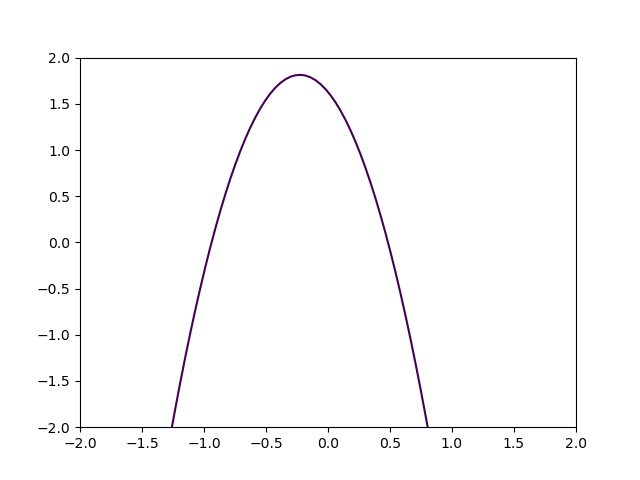

(1.01011^e12345) + (1.01011^e12348) - (1.01011^e12357) + (1.01011^e12378) - (2.69107^e12456) - (3.70118^e12457) + (2.69107^e12468) + (3.70118^e12478) - (2.69107^e12567) - (2.69107^e12678) + (0.51637^e13456) + (0.51637^e13457) - (0.51637^e13468) - (0.51637^e13478) + (0.51637^e13567) + (0.51637^e13678) + (0.51637^e14567) + (0.51637^e14678) - (0.8423^e23456) - (0.8423^e23457) + (0.8423^e23468) + (0.8423^e23478) - (0.8423^e23567) - (0.8423^e23678) - (0.8423^e24567) - (0.8423^e24678)


(-2, 2)

In [37]:
%matplotlib notebook
plt.figure()
C1 = up(rand_dp())^up(rand_dp())^up(rand_dp())^nm^nx
print(C1)
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, C1)
plt.contour(xs, ys, img1, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))